<a href="https://colab.research.google.com/github/hy05sprsea/KIKAGAKU-Tutorial/blob/master/KIKAGAKU_%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E3%81%AE%E5%AE%9F%E8%A3%85(%E5%88%86%E9%A1%9E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('wine_class.csv')
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [7]:
# 目的変数
t = df['Class']
# 入力変数
x = df.drop('Class', axis=1)

In [6]:
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [8]:
# 形の確認
x.shape

(178, 10)

In [9]:
type(x)

pandas.core.frame.DataFrame

In [10]:
type(x.values)

numpy.ndarray

In [13]:
np.unique(t)

array([1, 2, 3])

In [14]:
t = t.values - 1
x = x.values

In [16]:
type(t)

numpy.ndarray

In [17]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
x, type(x)

(array([[1.423e+01, 2.430e+00, 1.560e+01, ..., 5.640e+00, 1.040e+00,
         1.065e+03],
        [1.320e+01, 2.140e+00, 1.120e+01, ..., 4.380e+00, 1.050e+00,
         1.050e+03],
        [1.316e+01, 2.670e+00, 1.860e+01, ..., 5.680e+00, 1.030e+00,
         1.185e+03],
        ...,
        [1.327e+01, 2.260e+00, 2.000e+01, ..., 1.020e+01, 5.900e-01,
         8.350e+02],
        [1.317e+01, 2.370e+00, 2.000e+01, ..., 9.300e+00, 6.000e-01,
         8.400e+02],
        [1.413e+01, 2.740e+00, 2.450e+01, ..., 9.200e+00, 6.100e-01,
         5.600e+02]]), numpy.ndarray)

In [20]:
# 学習データとテストデータの分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

In [32]:
x_train.shape, x_train.dtype, x_test.shape, x_test.dtype

((124, 10), dtype('float32'), (124, 10), dtype('float32'))

In [34]:
t_train.shape, t_train.dtype, t_test.shape, t_test.dtype

((124,), dtype('int32'), (124,), dtype('int32'))

In [35]:
x_train = np.array(x_train, np.float32)
x_test = np.array(x_train, np.float32)
t_train = np.array(t_train, np.int32)
t_test = np.array(t_train, np.int32)

In [36]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

In [37]:
from tensorflow.keras import models, layers

In [39]:
# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
                           layers.Dense(units=10, activation='relu', input_shape=(10, )),
                           layers.Dense(units=3, activation='softmax')
])

In [40]:
# モデルのコンパイル
model.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [42]:
history = model.fit(x_train, t_train,
                    batch_size=10,
                    epochs=10,
                    validation_data=(x_test, t_test))

Epoch 1/10
13/13 [==============================] - 0s 17ms/step - loss: 494.3857 - accuracy: 0.2984 - val_loss: 1.0982 - val_accuracy: 0.3952
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 1.0982 - accuracy: 0.3952 - val_loss: 1.0971 - val_accuracy: 0.3952
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0972 - accuracy: 0.3952 - val_loss: 1.0966 - val_accuracy: 0.3952
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0967 - accuracy: 0.3952 - val_loss: 1.0962 - val_accuracy: 0.3952
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0964 - accuracy: 0.3952 - val_loss: 1.0955 - val_accuracy: 0.3952
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0955 - accuracy: 0.3952 - val_loss: 1.0949 - val_accuracy: 0.3952
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0948 - accuracy: 0.3952 - val_loss: 1.0945 - val_accuracy: 0.3952
Epoch 8/10
13/13 

In [43]:
history.history

{'accuracy': [0.2983871102333069,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827],
 'loss': [494.3856506347656,
  1.0981626510620117,
  1.0972340106964111,
  1.0966664552688599,
  1.0963795185089111,
  1.0955145359039307,
  1.094819188117981,
  1.0944644212722778,
  1.0941150188446045,
  1.0940911769866943],
 'val_accuracy': [0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827],
 'val_loss': [1.098228096961975,
  1.0971368551254272,
  1.096636414527893,
  1.09623122215271,
  1.0955188274383545,
  1.0949188470840454,
  1.0944960117340088,
  1.0941643714904785,
  1.0938093662261963,
  1.0934256315231323]}

In [44]:
result = pd.DataFrame(history.history)
result.head()

,loss,accuracy,val_loss,val_accuracy
0,494.385651,0.298387,1.098228,0.395161
1,1.098163,0.395161,1.097137,0.395161
2,1.097234,0.395161,1.096636,0.395161
3,1.096666,0.395161,1.096231,0.395161
4,1.096380,0.395161,1.095519,0.395161


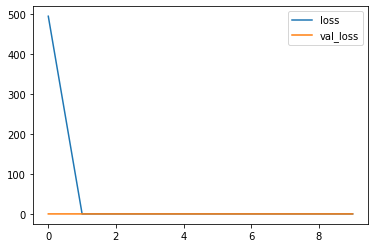

In [45]:
# 目的関数の値
result[['loss', 'val_loss']].plot()

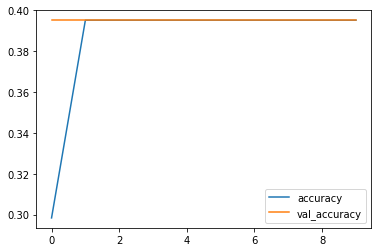

In [46]:
# 正解率
result[['accuracy', 'val_accuracy']].plot();

In [48]:
# シードの固定
reset_seed(0)

# モデルの構築
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルのコンパイル
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習
history = model.fit(x_train, t_train,
                    batch_size=10,
                    epochs=50,
                    validation_data=(x_test, t_test))

Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 1.1147 - accuracy: 0.4113 - val_loss: 6.6567 - val_accuracy: 0.2823
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.9663 - accuracy: 0.5242 - val_loss: 4.8539 - val_accuracy: 0.4194
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.8845 - accuracy: 0.6371 - val_loss: 4.2069 - val_accuracy: 0.5968
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7976 - accuracy: 0.6452 - val_loss: 3.8261 - val_accuracy: 0.5968
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.7996 - accuracy: 0.6774 - val_loss: 3.5485 - val_accuracy: 0.5887
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.8065 - val_loss: 3.2491 - val_accuracy: 0.5806
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5696 - accuracy: 0.8548 - val_loss: 2.9814 - val_accuracy: 0.5726
Epoch 8/50
13/13 [=

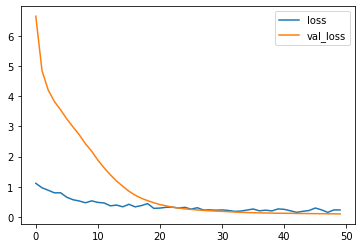

In [49]:
# 正解率と損失を Pandas の形式に変換
result_batchnorm = pd.DataFrame(history.history)

# 目的関数の値
result_batchnorm[['loss', 'val_loss']].plot();

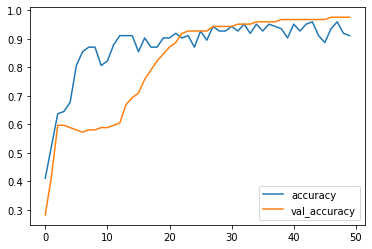

In [50]:
result_batchnorm[['accuracy', 'val_accuracy']].plot();

In [51]:
# モデルの保存
model.save(filepath='wine_model.h5', save_format='h5')

In [52]:
# モデルの読み込み
loaded_model = tf.keras.models.load_model('wine_model.h5')

In [53]:
# データの準備
sample = x_train[0]
sample.shape

(10,)

In [54]:
# 予測値の計算
loaded_model.predict(sample)

ValueError: ignored

In [55]:
# 形を変換
sample = sample.reshape(1, 10)
sample.shape

(1, 10)

In [56]:
# 予測値の計算
y = loaded_model.predict(sample)
y

array([[0.9737636 , 0.00732896, 0.01890747]], dtype=float32)

In [59]:
# 最も値の大きなラベルを取得
np.argmax(y)

0

In [60]:
t_train[0]

0